https://github.com/Teichlab/cellphonedb

'''
1) github download -> example file include we need
  - raw count matrix file = count.txt
  - output of annotaion file = meta.txt

2) change directory to the folder including count.txt and meta.txt

3) cmd: cellphonedb method statistical_analysis meta.txt count.txt
  - output file -> significant_means refers to intergrated output

4) cmd: cellphonedb plot dot_plot
  - output file -> plot output (interation : which receptor and ligand is expressed in what pairs )

5) cmd: cellphonedb plot heatmap_plot meta.txt
  - output file -> output (interaction : relation of cells)
 
*cellphoneDB detect not gene name only ensemble ID 
 '''

In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc

1-1. modify .mtx file

In [ ]:
feature = pd.read_csv("/data/mohyelim7/scRNAseq/rawMatrix_db/features.tsv", sep="\t", header=None)
feature.head()
print(str(feature))

In [ ]:
barcodes = pd.read_csv("/data/mohyelim7/scRNAseq/rawMatrix_db/barcodes.tsv", sep="\t", header=None)
barcodes.head()
print(str(barcodes))

In [ ]:
matrix = pd.read_csv("/data/mohyelim7/scRNAseq/rawMatrix_db/matrix.mtx", sep="\n")

In [ ]:
matrix.head(-1)

1-2. transform to inverse of normalization and transformation

In [2]:
data_dir = "/data/mohyelim7/scRNAseq/"
ad = sc.read_text(data_dir+"exprMatrix.tsv")
meta = pd.read_csv(data_dir+"meta.tsv", sep="\t")
ad.var = meta

In [3]:
ad

AnnData object with n_obs × n_vars = 36501 × 104559
    var: 'cell', 'cluster', 'sample', 'individual', 'region', 'age', 'sex', 'diagnosis', 'Capbatch', 'Seqbatch', 'post-mortem interval (hours)', 'RNA Integrity Number', 'genes', 'UMIs', 'RNA mitochondr. percent', 'RNA ribosomal percent'

In [4]:
adata = ad.T

/home/mohyelim7/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [5]:
adata.X

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 1.9677483, 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 2.1633284, 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 3.8806832, 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 2.7960377, 0.       ,
        0.       ]], dtype=float32)

In [6]:
count = np.power(2, adata.X)

In [7]:
count

array([[ 1.       ,  1.       ,  1.       , ...,  1.       ,  1.       ,
         1.       ],
       [ 1.       ,  1.       ,  1.       , ...,  3.9115713,  1.       ,
         1.       ],
       [ 1.       ,  1.       ,  1.       , ...,  1.       ,  1.       ,
         1.       ],
       ...,
       [ 1.       ,  4.479471 ,  1.       , ...,  1.       ,  1.       ,
         1.       ],
       [ 1.       ,  1.       ,  1.       , ..., 14.729976 ,  1.       ,
         1.       ],
       [ 1.       ,  1.       ,  1.       , ...,  6.945303 ,  1.       ,
         1.       ]], dtype=float32)

In [8]:
count_int = np.trunc(count)
count_int

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  3.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [ 1.,  4.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ..., 14.,  1.,  1.],
       [ 1.,  1.,  1., ...,  6.,  1.,  1.]], dtype=float32)

In [9]:
adata.X = count_int

In [18]:
adata.X

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  3.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [ 1.,  4.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ..., 14.,  1.,  1.],
       [ 1.,  1.,  1., ...,  6.,  1.,  1.]], dtype=float32)

In [32]:
adata

AnnData object with n_obs × n_vars = 104559 × 36501
    obs: 'cell', 'cluster', 'sample', 'individual', 'region', 'age', 'sex', 'diagnosis', 'Capbatch', 'Seqbatch', 'post-mortem interval (hours)', 'RNA Integrity Number', 'genes', 'UMIs', 'RNA mitochondr. percent', 'RNA ribosomal percent'

In [35]:
from scipy.stats import ttest_ind

In [ ]:
variable1 = adata[ adata.obs['diagnosis'] == 'control' ]
variable2 = adata[ adata.obs['diagnosis'] == 'ASD' ]

ttest = ttest_ind(variable1, 
          variable2, 
          equal_var=False, # it's not necessarily fair to assume that these two populations have equal variance
          nan_policy='omit') # omit NaN values
print(ttest)

         Falling back to preprocessing with `sc.pp.pca` and default params.
categories: AST-FB, AST-PP, Endothelial, etc.
var_group_labels: ASD, Control


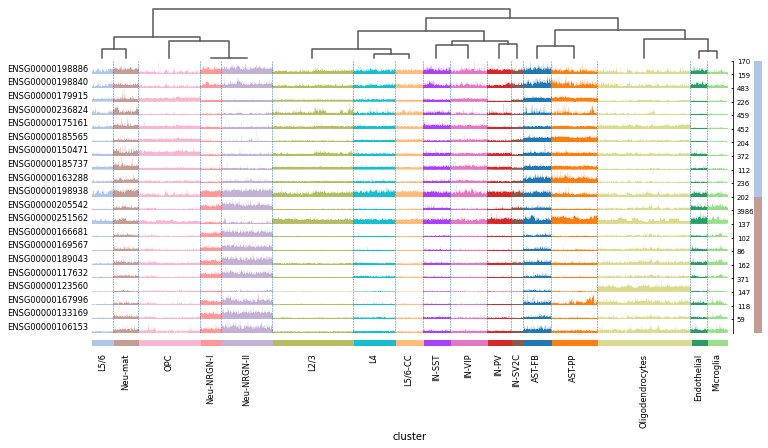

In [37]:
sc.tl.rank_genes_groups(adata, groupby='diagnosis', use_raw=True, 
                        method='t-test_overestim_var', n_genes=10) # compute differential expression
sc.pl.rank_genes_groups_tracksplot(adata, groupby='cluster') # plot the result

2. make virtual environment and set

In [ ]:
!conda create -n py37

In [ ]:
!conda activate py37

In [ ]:
!conda install python=3.7

In [ ]:
!pip install cellphonedb

In [ ]:
!cd /data/mohyelim7/scRNAseq

# data_dir = "/data/mohyelim7/scRNAseq"
# os.chdir(data_dir)

3. run cellphonedb and plot 

In [ ]:
# !cellphonedb method statistical_analysis meta.txt rawMatrix_db --iterations=10 --threads=30

In [ ]:
!cellphonedb method statistical_analysis meta.txt adata --iterations=10 --threads=30

In [ ]:
!cellphonedb plot dot_plot

In [ ]:
!cellphonedb plot heatmap_plot meta.txt